In [1]:
import pandas as pd
df = pd.read_csv("../data/products_data/df_amazon.csv")
df.shape

(1715, 5)

In [2]:
df

,Unnamed: 0,name,rating,no_of_reviews,img_links
0,0,JUGULAR Men's Half Sleeves Round-Neck Casual T...,3 out of 5,2 ratings,https://images-na.ssl-images-amazon.com/images...
1,1,Elements by Peter England Men's Regular fit T-...,5 out of 5,1 rating,https://images-na.ssl-images-amazon.com/images...
2,2,Elements by Peter England Men's T-Shirt,3.8 out of 5,101 ratings,https://images-na.ssl-images-amazon.com/images...
3,3,PrintOctopus Graphic Printed T-Shirt for Men |...,4.4 out of 5,44 ratings,https://images-na.ssl-images-amazon.com/images...
4,4,Scott International Men's Regular Fit T-Shirt ...,3.4 out of 5,815 ratings,https://images-na.ssl-images-amazon.com/images...
...,...,...,...,...,...
1710,1710,Spunk by FBB Men's Printed Regular fit T-Shirt,5 out of 5,1 rating,https://images-na.ssl-images-amazon.com/images...
1711,1711,WEXFORD Men's Regular Fit T-Shirt,3.5 out of 5,34 ratings,https://images-na.ssl-images-amazon.com/images...
1712,1712,Amazon Brand - Symbol Men's Solid Regular Fit ...,4 out of 5,647 ratings,https://images-na.ssl-images-amazon.com/images...
1713,1713,WEXFORD Men's Slim Fit T-Shirt,2.6 out of 5,8 ratings,https://images-na.ssl-images-amazon.com/images...


In [3]:
df = df.drop(columns=["Unnamed: 0"])

for i in range(len(df)):
  try:
    df.iloc[i][1] = df.iloc[i][1].split(" ")[0]
  except:
    pass
  try:
    df.iloc[i][2] = df.iloc[i][2].split(" ")[0].replace(",", "")
  except:
    pass
df.head()

,name,rating,no_of_reviews,img_links
0,JUGULAR Men's Half Sleeves Round-Neck Casual T...,3,2,https://images-na.ssl-images-amazon.com/images...
1,Elements by Peter England Men's Regular fit T-...,5,1,https://images-na.ssl-images-amazon.com/images...
2,Elements by Peter England Men's T-Shirt,3.8,101,https://images-na.ssl-images-amazon.com/images...
3,PrintOctopus Graphic Printed T-Shirt for Men |...,4.4,44,https://images-na.ssl-images-amazon.com/images...
4,Scott International Men's Regular Fit T-Shirt ...,3.4,815,https://images-na.ssl-images-amazon.com/images...


In [4]:
df["rating"] = df["rating"].astype('float32')
df["no_of_reviews"] = df["no_of_reviews"].astype('int32')

In [5]:
def pop_met(n, s):
    top = s*(15+n)*1.0
    bott = n+5*s*1.0
    pm = top/bott
    return pm

df["popularity"] = pop_met(df["no_of_reviews"], df["rating"])

df

,name,rating,no_of_reviews,img_links,popularity
0,JUGULAR Men's Half Sleeves Round-Neck Casual T...,3.0,2,https://images-na.ssl-images-amazon.com/images...,3.000000
1,Elements by Peter England Men's Regular fit T-...,5.0,1,https://images-na.ssl-images-amazon.com/images...,3.076923
2,Elements by Peter England Men's T-Shirt,3.8,101,https://images-na.ssl-images-amazon.com/images...,3.673333
3,PrintOctopus Graphic Printed T-Shirt for Men |...,4.4,44,https://images-na.ssl-images-amazon.com/images...,3.933333
4,Scott International Men's Regular Fit T-Shirt ...,3.4,815,https://images-na.ssl-images-amazon.com/images...,3.391827
...,...,...,...,...,...
1710,Spunk by FBB Men's Printed Regular fit T-Shirt,5.0,1,https://images-na.ssl-images-amazon.com/images...,3.076923
1711,WEXFORD Men's Regular Fit T-Shirt,3.5,34,https://images-na.ssl-images-amazon.com/images...,3.330097
1712,Amazon Brand - Symbol Men's Solid Regular Fit ...,4.0,647,https://images-na.ssl-images-amazon.com/images...,3.970015
1713,WEXFORD Men's Slim Fit T-Shirt,2.6,8,https://images-na.ssl-images-amazon.com/images...,2.847619


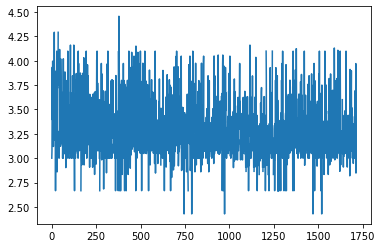

In [6]:
import matplotlib.pyplot as plt

plt.plot(df["popularity"])

In [7]:
import os, sys, shutil

for i in range(len(df)):
    name = "../imgs/amazon/crop_" + str(i) + ".jpg"
    if(os.path.exists(name) == False): continue
    pop = df.loc[i]["popularity"]
    if(pop > 2.4 and pop < 3): shutil.move(name, "../imgs/dataset/" + "0")
    elif(pop >= 3 and pop < 3.5) : shutil.move(name, "../imgs/dataset/" + "1")
    elif(pop >= 3.5 and pop < 4) : shutil.move(name, "../imgs/dataset/" + "2")
    else: shutil.move(name, "../imgs/dataset/" + "3")

In [8]:
import tensorflow as tf

physical_devices = tf.config.list_physical_devices('GPU') 
for device in physical_devices:
    tf.config.experimental.set_memory_growth(device, True)

from tensorflow.keras.preprocessing import image_dataset_from_directory


BATCH_SIZE = 32
IMG_SIZE = (160, 160)

data_dir = "../imgs/dataset"

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  shuffle = True,
  subset="training",
  seed=123,
  image_size=IMG_SIZE,
  batch_size=BATCH_SIZE)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  shuffle = True,
  subset="validation",
  seed=123,
  image_size=IMG_SIZE,
  batch_size=BATCH_SIZE)

Found 1576 files belonging to 4 classes.
Using 1261 files for training.
Found 1576 files belonging to 4 classes.
Using 315 files for validation.


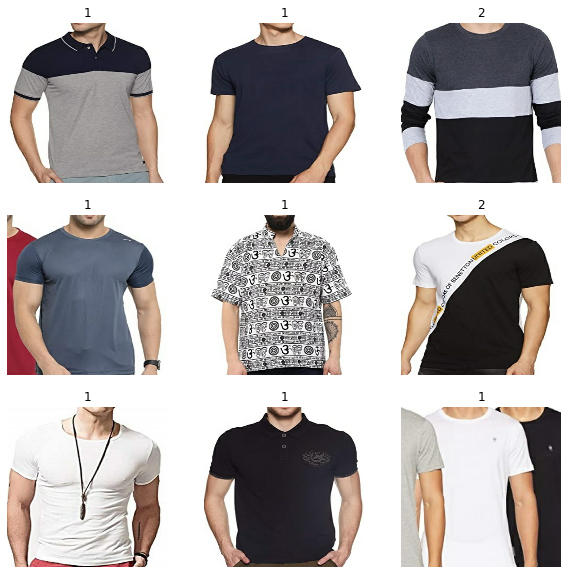

In [9]:
class_names = train_ds.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [10]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)

In [11]:
rescale = tf.keras.layers.experimental.preprocessing.Rescaling(1./127.5, offset= -1)

In [12]:
from tensorflow.keras.applications.vgg16 import VGG16

IMG_SHAPE = IMG_SIZE + (3,)
model = VGG16(weights="imagenet", include_top=False, input_shape = IMG_SHAPE)

In [13]:
image_batch, label_batch = next(iter(train_ds))
feature_batch = model(image_batch)
print(feature_batch.shape)

(32, 5, 5, 512)


In [14]:
model.trainable = False

In [15]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(32, 512)


In [16]:
prediction_layer = tf.keras.layers.Dense(3)
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(32, 3)


In [17]:
inputs = tf.keras.Input(shape=(160, 160, 3))
x = rescale(inputs)
x = model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

In [18]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [19]:
initial_epochs = 10

loss0, accuracy0 = model.evaluate(val_ds)

10/10 [==============================] - 16s 702ms/step - loss: nan - accuracy: 0.1384


In [20]:
history = model.fit(train_ds,
                    epochs=initial_epochs,
                    validation_data=val_ds)

Epoch 1/10
40/40 [==============================] - 17s 382ms/step - loss: nan - accuracy: 0.1015 - val_loss: nan - val_accuracy: 0.0730
Epoch 2/10
40/40 [==============================] - 10s 247ms/step - loss: nan - accuracy: 0.0849 - val_loss: nan - val_accuracy: 0.0730
Epoch 3/10
40/40 [==============================] - 11s 267ms/step - loss: nan - accuracy: 0.0849 - val_loss: nan - val_accuracy: 0.0730
Epoch 4/10
40/40 [==============================] - 11s 270ms/step - loss: nan - accuracy: 0.0849 - val_loss: nan - val_accuracy: 0.0730
Epoch 5/10
40/40 [==============================] - 11s 279ms/step - loss: nan - accuracy: 0.0849 - val_loss: nan - val_accuracy: 0.0730
Epoch 6/10
40/40 [==============================] - 12s 287ms/step - loss: nan - accuracy: 0.0849 - val_loss: nan - val_accuracy: 0.0730
Epoch 7/10
40/40 [==============================] - 12s 293ms/step - loss: nan - accuracy: 0.0849 - val_loss: nan - val_accuracy: 0.0730
Epoch 8/10
40/40 [=======================

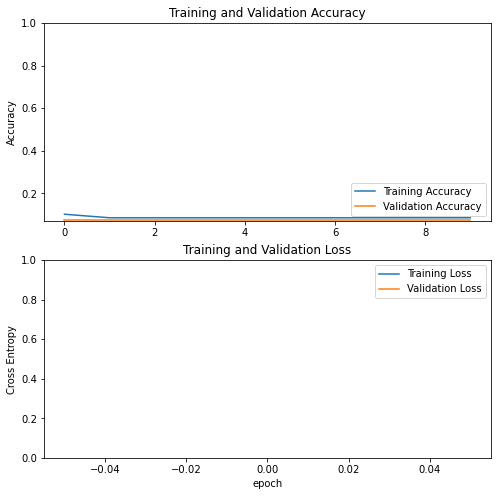

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [22]:
model.save('../models/')

INFO:tensorflow:Assets written to: ../models/assets
